In [35]:
import pandas as pd

In [36]:
data_latih = pd.read_csv('../output/tf-idf/dataset_digital_bank_indo_clean_extract.csv', encoding='utf-8')
data_latih

,aatau,aaya,abadi,abang,abdet,abis,abiss,abisssss,acc,access,...,yak,ydah,years,yeessss,you,your,yudha,yuk,zaman,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,netral
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif


### Oversampling

In [37]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(data_latih['sentimen'] == 'positif')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(data_latih['sentimen'] == 'negatif')))
print("Sebelum Oversampling, jumlah label 'NETRAL': {} ".format(sum(data_latih['sentimen'] == 'netral')))

Sebelum Oversampling, jumlah label 'POSITIF': 809
Sebelum Oversampling, jumlah label 'NEGATIF': 425 
Sebelum Oversampling, jumlah label 'NETRAL': 228 


#### SMOTE

In [38]:
# SMOTE
# !pip install imblearn

from imblearn.over_sampling import SMOTE

In [39]:
X = data_latih.drop('sentimen', axis=1)
y = data_latih['sentimen']

sm = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [40]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(y_res == 'positif')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(y_res == 'negatif')))
print("Sebelum Oversampling, jumlah label 'NETRAL': {} ".format(sum(y_res == 'netral')))

Sebelum Oversampling, jumlah label 'POSITIF': 809
Sebelum Oversampling, jumlah label 'NEGATIF': 809 
Sebelum Oversampling, jumlah label 'NETRAL': 809 


In [41]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

Counter({'positif': 809, 'negatif': 425, 'netral': 228})


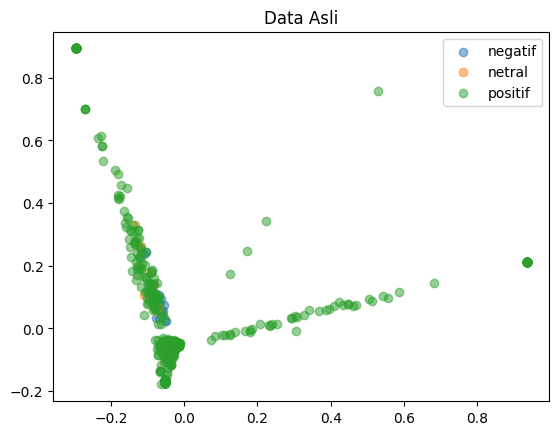

Counter({'positif': 809, 'negatif': 809, 'netral': 809})


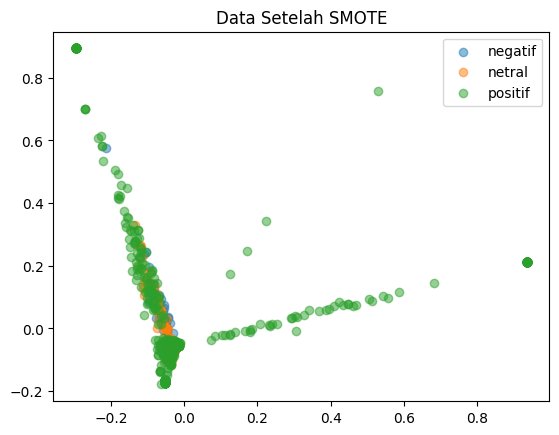

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Ubah label menjadi angka
le = LabelEncoder()
y_num = le.fit_transform(y)
y_res_num = le.transform(y_res)

# Plot data asli
print(Counter(y))
for label in np.unique(y_num):
    plt.scatter(X_pca[y_num == label, 0], X_pca[y_num == label, 1], label=str(le.inverse_transform([label])[0]), alpha=0.5)
plt.title('Data Asli')
plt.legend()
plt.show()

# Plot data setelah SMOTE
print(Counter(y_res))
for label in np.unique(y_res_num):
    plt.scatter(X_res_pca[y_res_num == label, 0], X_res_pca[y_res_num == label, 1], label=str(le.inverse_transform([label])[0]), alpha=0.5)
plt.title('Data Setelah SMOTE')
plt.legend()
plt.show()


In [43]:
print(type(X_res))
print(type(y_res))
print(X_res.shape)
print(y_res.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2427, 2337)
(2427,)


### KNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier(n_neighbors=3)

#### K-Fold Cross Validation

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [49]:
conf_matrices = []
class_reports = []

precisions = []
recalls = []
f1_scores = []
accuracies = []

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

Fold 1:

Confusion Matrix:
 [[70 14  0]
 [ 2 69  1]
 [ 9 28 50]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.86      0.83      0.85        84
      netral       0.62      0.96      0.75        72
     positif       0.98      0.57      0.72        87

    accuracy                           0.78       243
   macro avg       0.82      0.79      0.78       243
weighted avg       0.83      0.78      0.78       243

Accuracy:  0.7777777777777778

----------------------



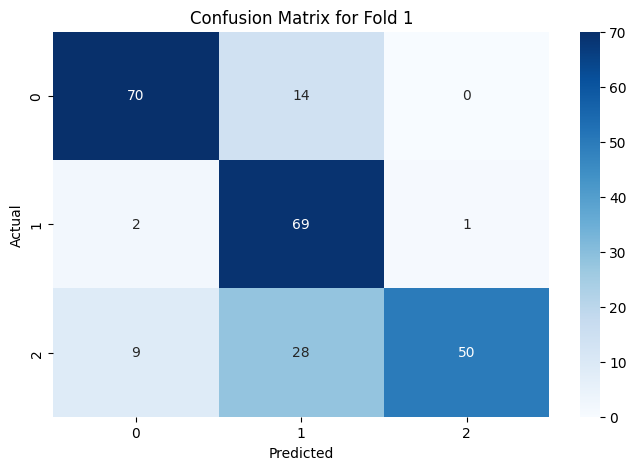

Fold 2:

Confusion Matrix:
 [[82  7  1]
 [ 1 77  1]
 [11 15 48]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.87      0.91      0.89        90
      netral       0.78      0.97      0.87        79
     positif       0.96      0.65      0.77        74

    accuracy                           0.85       243
   macro avg       0.87      0.84      0.84       243
weighted avg       0.87      0.85      0.85       243

Accuracy:  0.8518518518518519

----------------------



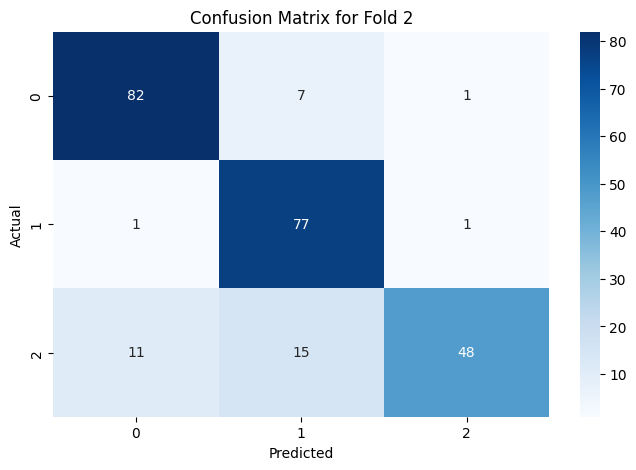

Fold 3:

Confusion Matrix:
 [[64  9  0]
 [ 4 81  0]
 [ 9 16 60]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.83      0.88      0.85        73
      netral       0.76      0.95      0.85        85
     positif       1.00      0.71      0.83        85

    accuracy                           0.84       243
   macro avg       0.87      0.85      0.84       243
weighted avg       0.87      0.84      0.84       243

Accuracy:  0.8436213991769548

----------------------



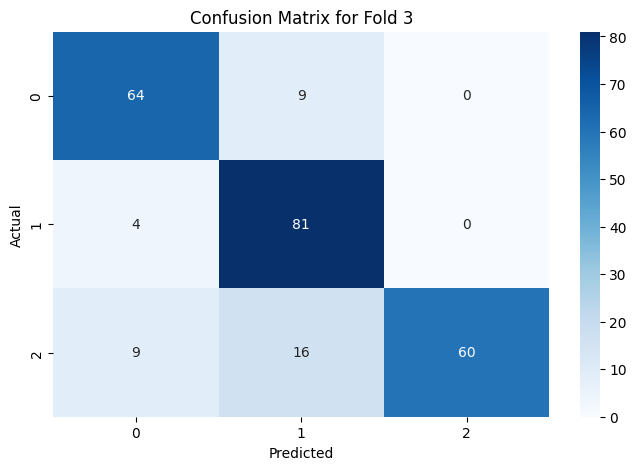

Fold 4:

Confusion Matrix:
 [[68  8  0]
 [ 1 80  0]
 [12 21 53]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.84      0.89      0.87        76
      netral       0.73      0.99      0.84        81
     positif       1.00      0.62      0.76        86

    accuracy                           0.83       243
   macro avg       0.86      0.83      0.82       243
weighted avg       0.86      0.83      0.82       243

Accuracy:  0.8271604938271605

----------------------



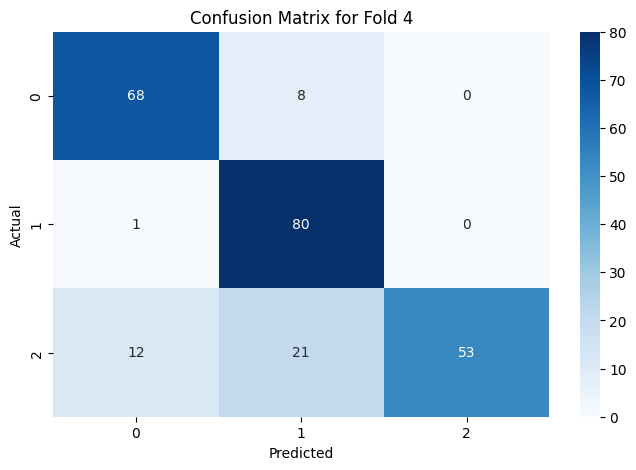

Fold 5:

Confusion Matrix:
 [[66 10  0]
 [ 0 82  0]
 [ 7 28 50]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.90      0.87      0.89        76
      netral       0.68      1.00      0.81        82
     positif       1.00      0.59      0.74        85

    accuracy                           0.81       243
   macro avg       0.86      0.82      0.81       243
weighted avg       0.86      0.81      0.81       243

Accuracy:  0.8148148148148148

----------------------



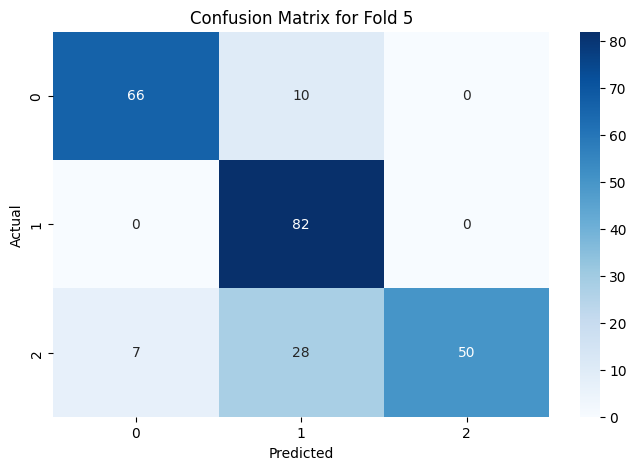

Fold 6:

Confusion Matrix:
 [[74  5  1]
 [ 4 85  0]
 [ 5 19 50]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.89      0.93      0.91        80
      netral       0.78      0.96      0.86        89
     positif       0.98      0.68      0.80        74

    accuracy                           0.86       243
   macro avg       0.88      0.85      0.86       243
weighted avg       0.88      0.86      0.86       243

Accuracy:  0.8600823045267489

----------------------



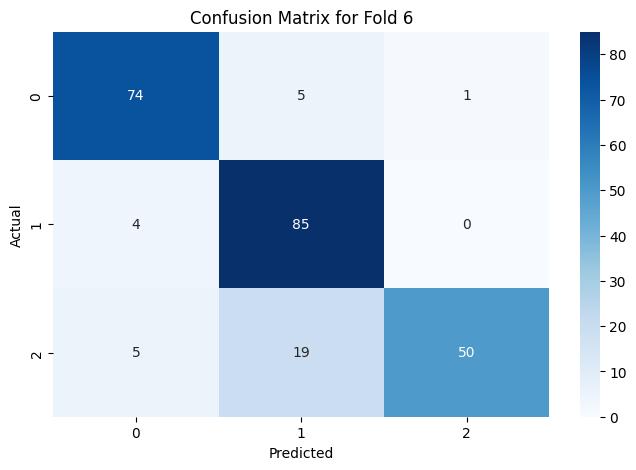

Fold 7:

Confusion Matrix:
 [[78  8  0]
 [ 0 73  0]
 [11 18 55]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.91      0.89        86
      netral       0.74      1.00      0.85        73
     positif       1.00      0.65      0.79        84

    accuracy                           0.85       243
   macro avg       0.87      0.85      0.84       243
weighted avg       0.88      0.85      0.84       243

Accuracy:  0.8477366255144033

----------------------



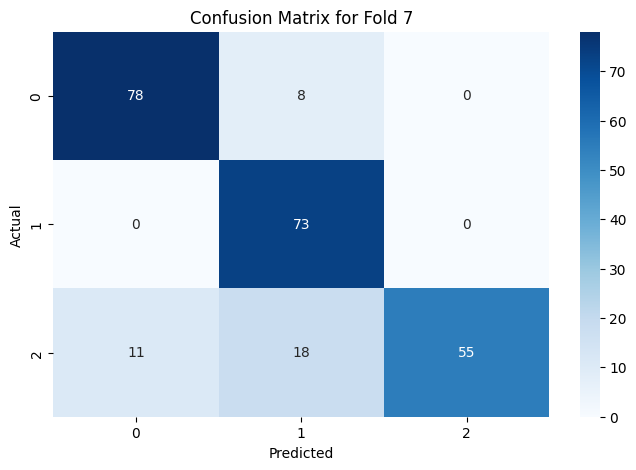

Fold 8:

Confusion Matrix:
 [[66 10  1]
 [ 5 79  1]
 [11 24 45]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.80      0.86      0.83        77
      netral       0.70      0.93      0.80        85
     positif       0.96      0.56      0.71        80

    accuracy                           0.79       242
   macro avg       0.82      0.78      0.78       242
weighted avg       0.82      0.79      0.78       242

Accuracy:  0.7851239669421488

----------------------



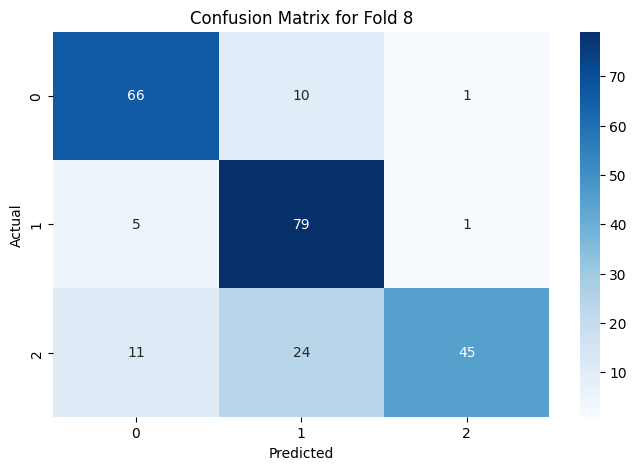

Fold 9:

Confusion Matrix:
 [[65  6  0]
 [ 1 83  0]
 [ 8 22 57]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.92      0.90        71
      netral       0.75      0.99      0.85        84
     positif       1.00      0.66      0.79        87

    accuracy                           0.85       242
   macro avg       0.88      0.85      0.85       242
weighted avg       0.88      0.85      0.84       242

Accuracy:  0.8471074380165289

----------------------



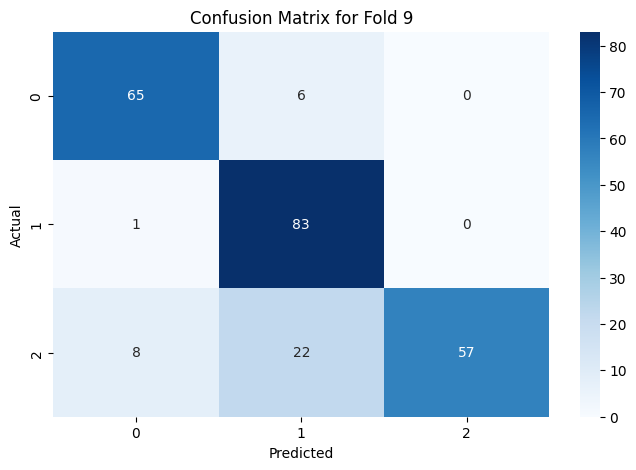

Fold 10:

Confusion Matrix:
 [[85  8  3]
 [ 0 79  0]
 [ 4 11 52]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.96      0.89      0.92        96
      netral       0.81      1.00      0.89        79
     positif       0.95      0.78      0.85        67

    accuracy                           0.89       242
   macro avg       0.90      0.89      0.89       242
weighted avg       0.90      0.89      0.89       242

Accuracy:  0.8925619834710744

----------------------



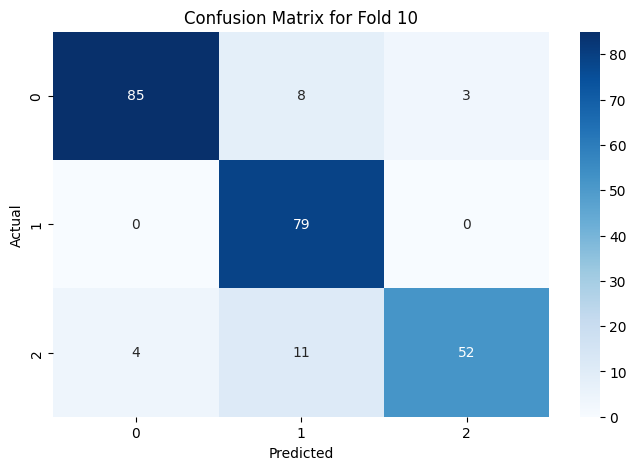

In [51]:
kFold = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kFold.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))  
    
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

for i, (conf_matrix, class_report) in enumerate(zip(conf_matrices, class_reports)):
    print(f"Fold {i+1}:\n")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("Accuracy: ", accuracies[i]) 
    print("\n----------------------\n")

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()

In [52]:
import numpy as np

In [53]:
# total_conf_matrix = np.zeros((2, 2))
total_conf_matrix = np.zeros((3, 3))

for conf_matrix in conf_matrices:
    total_conf_matrix += conf_matrix

avg_conf_matrix = total_conf_matrix / len(conf_matrices)

print("Rata-Rata Confusion Matrix:\n", avg_conf_matrix)

Rata-Rata Confusion Matrix:
 [[71.8  8.5  0.6]
 [ 1.8 78.8  0.3]
 [ 8.7 20.2 52. ]]


In [54]:
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Rata-Rata Precision: ", avg_precision)
print("Rata-Rata Recall: ", avg_recall)
print("Rata-Rata F1-Score: ", avg_f1_score)
print("Rata-Rata Accuracy: ", avg_accuracy)

Rata-Rata Precision:  0.8630765235293454
Rata-Rata Recall:  0.8359502285910356
Rata-Rata F1-Score:  0.8311665749662931
Rata-Rata Accuracy:  0.8347838655919464


In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

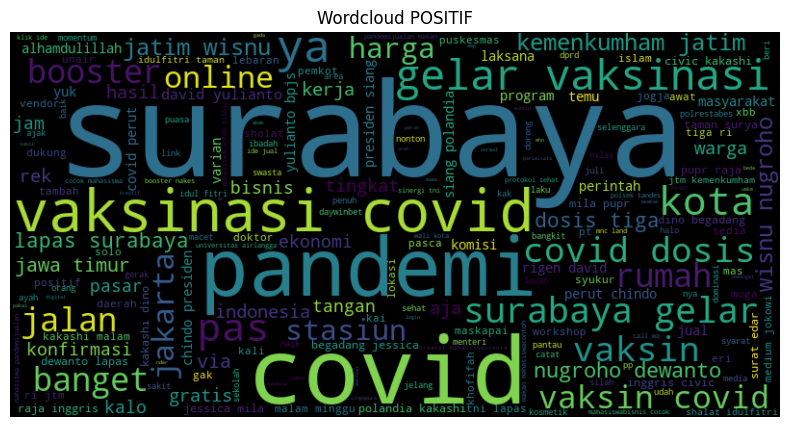

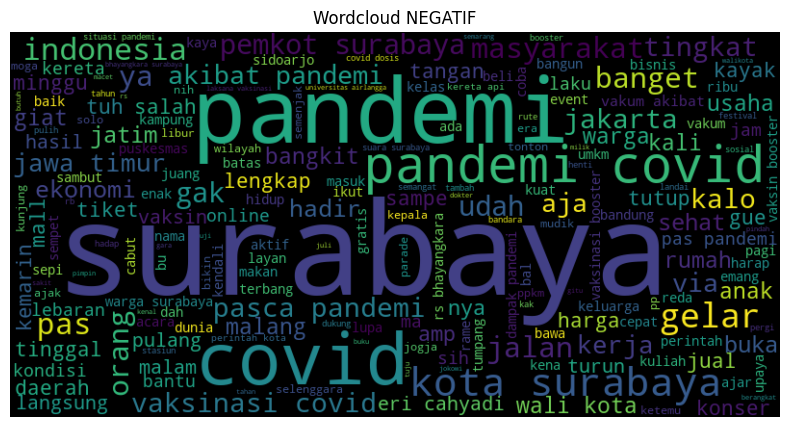

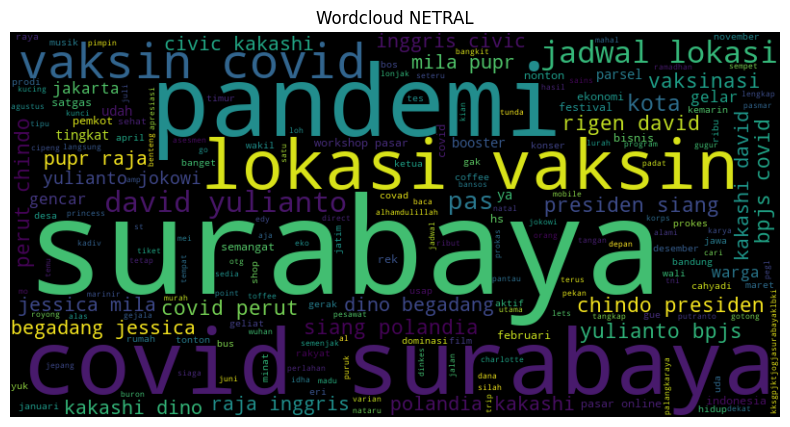

In [23]:
dataCleaning = pd.read_csv('../output/cleaning/tweets_sentiment_covid_fix_clean.csv')

positive_text = ' '.join(dataCleaning[dataCleaning['polarity'] == 'positive']['resultStemming'])
negative_text = ' '.join(dataCleaning[dataCleaning['polarity'] == 'negative']['resultStemming'])
neutral_text = ' '.join(dataCleaning[dataCleaning['polarity'] == 'neutral']['resultStemming'])

# Hapus tanda '
positive_text = positive_text.replace("'", "")
negative_text = negative_text.replace("'", "")
neutral_text = neutral_text.replace("'", "")

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Wordcloud POSITIF')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Wordcloud NEGATIF')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Wordcloud NETRAL')
plt.axis('off')
plt.show()
